# Worksheet 02

Name:  Jingbo Wang
UID: U04536921

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?


A major disadvantage of a top-level design approach is that it may lack flexibility in adapting to changes or unforeseen needs that arise later, and may result in integration issues being overlooked, creating challenges later in the development process.

b) What is a drawback of the bottom up approach?


A bottom-up approach can result in insufficient vision of the overall architecture, making integration and coordination of the final system complex and difficult.

c) What are 3 things you can do to have a better debugging experience?

To improve the debugging experience, you can use breakpoints to step through code, use logging to track program execution flow, and write unit tests to locate and resolve issues with specific functions.


d) (Optional) Follow along with the live coding. You can write your code here:

In [2]:
def add_numbers(a, b):
    print(f"Adding {a} and {b}")
    result = a + b
    return result

def test_add_numbers():
    assert add_numbers(2, 3) == 5, "Should be 5"
    assert add_numbers(-1, 1) == 0, "Should be 0"
    print("All tests passed!")

test_add_numbers()

Adding 2 and 3
Adding -1 and 1
All tests passed!


## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [31]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [32]:
print("There are " + str(df.isnull().any(axis=1).sum()) + " rows with at least one empty value")

There are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [33]:
df = df.loc[:, df.isnull().sum() <= 200]
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [34]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [36]:
df[['Last Name', 'Title', 'Full Name']] = df['Name'].str.extract(r'([^,]+), (\w+)\. (.*)')


df['First Name'] = df['Full Name'].apply(lambda x: str(x).split()[0] if x else '')
df['Middle Name'] = df['Full Name'].apply(lambda x: ' '.join(str(x).split()[1:]) if x and len(str(x).split()) > 1 else '')

df.drop('Full Name', axis=1, inplace=True)

df = df[['First Name', 'Middle Name', 'Last Name', 'Title'] + [col for col in df.columns if col not in ['First Name', 'Middle Name', 'Last Name', 'Title']]]

df.head()

,First Name,Middle Name,Last Name,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,Owen,Harris,Braund,Mr,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,John,Bradley (Florence Briggs Thayer),Cumings,Mrs,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,Laina,,Heikkinen,Miss,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,Jacques,Heath (Lily May Peel),Futrelle,Mrs,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,William,Henry,Allen,Mr,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


f) Complete the code below to replace all missing ages with the average age

In [37]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,First Name,Middle Name,Last Name,Title,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,Owen,Harris,Braund,Mr,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,John,Bradley (Florence Briggs Thayer),Cumings,Mrs,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,Laina,,Heikkinen,Miss,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,Jacques,Heath (Lily May Peel),Futrelle,Mrs,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,William,Henry,Allen,Mr,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

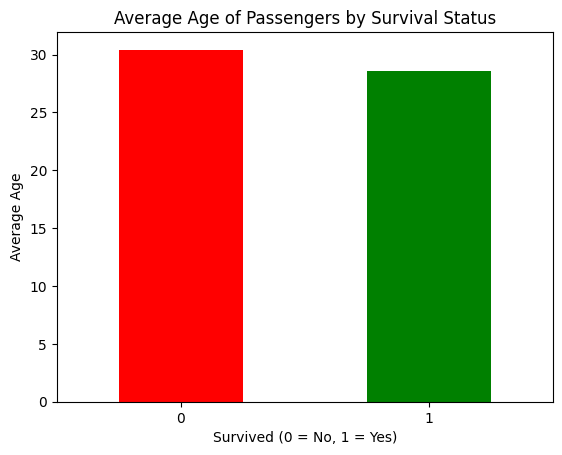

In [38]:
import matplotlib.pyplot as plt

average_ages = df.groupby('Survived')['Age'].mean()

average_ages.plot(kind='bar', color=['red', 'green'])
plt.title('Average Age of Passengers by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()


https://github.com/gallettilance/Data-Science-Fundamentals/pull/310/commits/7b4e57a7ac5763c40f23644e1ddc884f9231ad20